In [4]:
# Tunahan Arslan 29210
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
df1 = pd.read_csv('/content/Stock Market Dataset.csv')
df2 = pd.read_csv('/content/worldometer_coronavirus_daily_data.csv')
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df1 = df1[df1['Date'].between('01-01-2020','31-12-2022')]
df1.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
273,273,2022-12-30,4.475,62280.0,80.47,NaN,3.8130,10.0,"16,607.20",192760.0,...,"4,68,711",3360.0,294.88,7570000.0,84.00,62400000.0,120.34,19580000.0,"1,826.20",107500.0
274,274,2022-12-29,4.559,78440.0,78.61,NaN,3.8265,40.0,"16,636.40",181470.0,...,"4,68,725",3040.0,291.12,9560000.0,84.18,55000000.0,120.26,22300000.0,"1,826.00",105990.0
275,275,2022-12-28,4.709,1720.0,78.60,NaN,3.8425,42610.0,"16,546.20",217960.0,...,"4,59,800",3030.0,276.88,5930000.0,81.82,58230000.0,115.62,19550000.0,"1,815.80",118080.0
276,276,2022-12-27,5.282,41150.0,79.77,NaN,3.8405,48120.0,"16,706.10",192180.0,...,"4,61,955",4470.0,284.17,5690000.0,83.04,57280000.0,116.88,20860000.0,"1,823.10",159620.0
277,277,2022-12-23,4.980,87380.0,79.34,NaN,3.8090,38560.0,"16,779.10",184120.0,...,"4,63,400",2800.0,294.96,4250000.0,85.25,57430000.0,118.04,17760000.0,"1,804.20",105460.0


In [5]:
df1['Bitcoin_Price'].isnull().sum()

0

In [ ]:
df1['Bitcoin_Price'].describe()

count           740
unique          739
top       21,365.20
freq              2
Name: Bitcoin_Price, dtype: object

In [ ]:
df2.head()


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [ ]:
df2.describe()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,1.847870e+05,174329.000000,1.667470e+05,1.782270e+05,157850.000000
mean,7.251089e+05,2987.633285,6.239283e+04,1.388600e+04,39.831834
std,3.681471e+06,17803.232663,3.955641e+05,6.049521e+04,181.102770
min,0.000000e+00,-322.000000,-1.432100e+04,0.000000e+00,-39.000000
25%,1.099000e+03,0.000000,6.000000e+01,2.400000e+01,0.000000
50%,1.775600e+04,58.000000,1.386000e+03,3.040000e+02,1.000000
75%,2.238085e+05,728.000000,1.462050e+04,4.111000e+03,12.000000
max,8.420947e+07,909610.000000,1.793543e+07,1.026646e+06,5093.000000


In [6]:
mask = df2['country'] == 'USA'
us_data = df2[mask]
us_data['date'] = pd.to_datetime(us_data['date'], format='%Y-%m-%d')
us_data=us_data[us_data['date'].between('01-01-2020','31-12-2022')]
us_data.head()

<ipython-input-6-518c5f0f2ed6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_data['date'] = pd.to_datetime(us_data['date'], format='%Y-%m-%d')


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
176587,2020-02-15,USA,15.0,NaN,12.0,0.0,NaN
176588,2020-02-16,USA,15.0,0.0,12.0,0.0,NaN
176589,2020-02-17,USA,15.0,0.0,12.0,0.0,NaN
176590,2020-02-18,USA,15.0,0.0,12.0,0.0,NaN
176591,2020-02-19,USA,15.0,0.0,12.0,0.0,NaN


In [ ]:
us_data['daily_new_cases']

176587        NaN
176588        0.0
176589        0.0
176590        0.0
176591        0.0
           ...   
177402    85415.0
177403    99308.0
177404    99100.0
177405    88769.0
177406    26740.0
Name: daily_new_cases, Length: 820, dtype: float64

In [ ]:
us_data.describe()

,date,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,820,8.200000e+02,819.000000,8.200000e+02,8.200000e+02,815.000000
mean,2021-03-30 12:00:00.000000256,3.161365e+07,102819.851038,3.256485e+06,5.023898e+05,1259.688344
min,2020-02-15 00:00:00,1.500000e+01,0.000000,1.000000e+01,0.000000e+00,0.000000
25%,2020-09-06 18:00:00,6.667717e+06,33101.500000,1.192466e+06,1.975215e+05,589.000000
50%,2021-03-30 12:00:00,3.135999e+07,61092.000000,2.243084e+06,5.730690e+05,1022.000000
75%,2021-10-21 06:00:00,4.659445e+07,119769.000000,4.198612e+06,7.651068e+05,1742.000000
max,2022-05-14 00:00:00,8.420947e+07,909610.000000,1.793543e+07,1.026646e+06,4352.000000
std,NaN,2.615952e+07,135073.542354,3.399781e+06,3.201851e+05,900.680962


In [7]:
df1['Date'] = pd.to_datetime(df1['Date'])
us_data['Date'] = pd.to_datetime(us_data['date'])

# Merge the datasets on the Date column
merged_data = pd.merge(df1, us_data, how='inner', left_on='Date', right_on='date')

# Drop the duplicate date column
merged_data.drop(columns=['date'], inplace=True)

# Now merged_data contains both datasets merged on the date column
print(merged_data.head(10))

   Unnamed: 0     Date_x  Natural_Gas_Price  Natural_Gas_Vol.  \
0         428 2022-05-13              7.663           85040.0   
1         429 2022-05-12              7.739          107060.0   
2         430 2022-05-11              7.640          120930.0   
3         431 2022-05-10              7.385          185460.0   
4         432 2022-05-09              7.026          202620.0   
5         433 2022-05-06              8.043          168300.0   
6         434 2022-05-05              8.783          160160.0   
7         435 2022-05-04              8.415          132320.0   
8         436 2022-05-03              7.954          153340.0   
9         437 2022-05-02              7.475          110920.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0           110.49        240990.0        4.1955        350.0     29,284.40   
1           106.13        323550.0        4.1265       1060.0     28,976.00   
2           105.71        382700.0        4.233

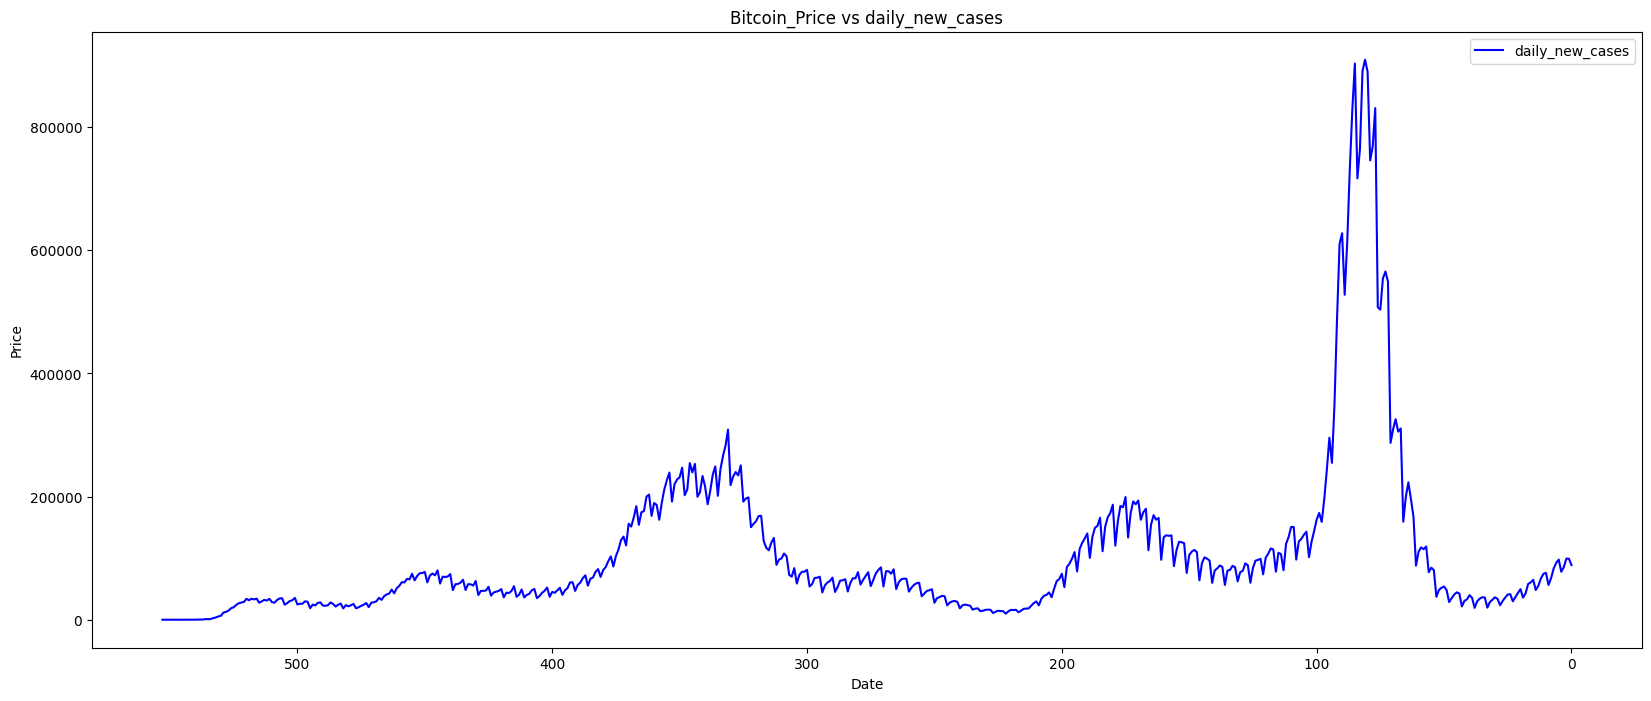

In [ ]:
merged_data[['Bitcoin_Price','daily_new_cases']].plot(figsize=(20,8),color=['blue','red'])
plt.title('Bitcoin_Price vs daily_new_cases')
plt.xlabel('Date')
plt.ylabel('Price')
plt.gca().invert_xaxis()

plt.show()

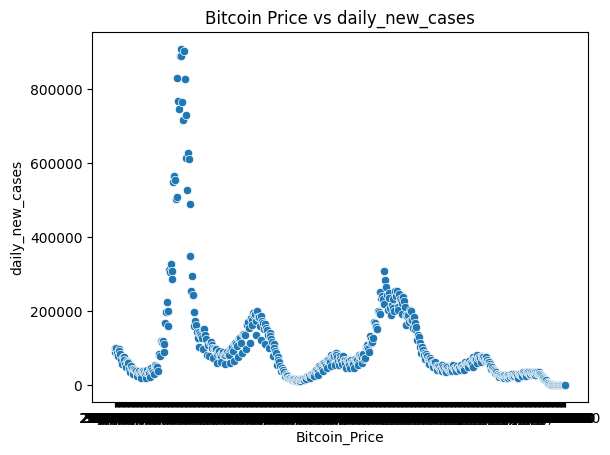

In [ ]:
sns.scatterplot(x=merged_data['Bitcoin_Price'], y=merged_data['daily_new_cases'])
plt.title('Bitcoin Price vs daily_new_cases')
plt.show()

Null Hypothesis: There is a significant correlation between Bitcoin_Price and daily_new_cases in the two year period between 2020-2022.

Alternative Hypothesis: There is no significant correlation between Bitcoin_Price and daily_new_cases in the two year period between 2020-2022.

Level of Significance = 0.05







In [ ]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(merged_data['Bitcoin_Price'],merged_data['daily_new_cases'])

# Print the correlation coefficient and p-value
print("Pearson correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Check for significance
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant correlation between Bitcoin_Price and daily_new_cases.")
else:
    print("There is no significant correlation between Bitcoin_Price and daily_new_cases.")


Pearson correlation coefficient: 0.2123159029573104
P-value: 4.5673528364596627e-07
There is a significant correlation between Bitcoin_Price and daily_new_cases.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
y=merged_data.Bitcoin_Price
X=merged_data[['daily_new_cases']]
model_lr = LinearRegression().fit(X,y)
model_lr

LinearRegression()

In [ ]:
model_lr.coef_

array([0.02856665])

In [ ]:
model_lr.intercept_

29222.28684690764

In [ ]:
model_lr.predict(merged_data[['daily_new_cases']])

array([31758.12022175, 32053.2423319 , 32059.18419608, 31662.30766175,
       31449.1147174 , 32010.39234978, 31860.16031249, 31592.91925738,
       31149.27910922, 30833.13194119, 31398.83740505, 31350.30265865,
       31132.48191623, 30792.96722462, 30600.79933817, 31075.14864017,
       30951.74069168, 30880.29548817, 30447.33926889, 30245.74438637,
       30641.33542125, 30464.73636163, 30275.36800734, 30076.60122364,
       30406.80318581, 30393.46255804, 30251.48628397, 30091.34161749,
       29892.31773389, 30188.52537692, 30263.19861242, 30150.33175953,
       30047.29183587, 29783.22167943, 30253.14314995, 30266.14097786,
       30198.55227274, 30079.22935588, 29773.7089834 , 30239.00265585,
       30362.43917099, 30167.95738551, 30098.88321434, 29838.69812294,
       30440.85463826, 30492.24605014, 30389.60605965, 30224.60506186,
       30041.03573848, 30598.22833924, 30763.25790369, 30704.32489495,
       30603.71313695, 30284.05227038, 31525.33055225, 31635.65497287,
      

In [ ]:
r2_score(
    y_true = merged_data.Bitcoin_Price,
    y_pred = model_lr.predict(merged_data[['daily_new_cases']])
)

0.045078042648577954

In [ ]:
from plotnine import ggplot, aes, geom_point, geom_line
from plotnine.themes import theme_minimal
merged_data['fitted'] = model_lr.predict(merged_data[['daily_new_cases']])
merged_data.head()

,Unnamed: 0,Date_x,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Gold_Price,Gold_Vol.,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,Date_y,fitted
0,428,2022-05-13,7.663,85040.0,110.49,240990.0,4.1955,350.0,29284.4,141230.0,...,"1,808.20",179480.0,USA,84182733.0,88769.0,1949109.0,1026591.0,282.0,2022-05-13,31758.120222
1,429,2022-05-12,7.739,107060.0,106.13,323550.0,4.1265,1060.0,28976.0,309480.0,...,"1,824.60",255610.0,USA,84093964.0,99100.0,1903966.0,1026309.0,289.0,2022-05-12,32053.242332
2,430,2022-05-11,7.640,120930.0,105.71,382700.0,4.2335,940.0,29068.2,296900.0,...,"1,853.70",243560.0,USA,83994864.0,99308.0,1853628.0,1026020.0,319.0,2022-05-11,32059.184196
3,431,2022-05-10,7.385,185460.0,99.76,389750.0,4.1845,1020.0,31007.5,235610.0,...,"1,841.00",260810.0,USA,83895556.0,85415.0,1802388.0,1025701.0,392.0,2022-05-10,31662.307662
4,432,2022-05-09,7.026,202620.0,103.09,368180.0,4.2220,1040.0,30095.0,268090.0,...,"1,858.60",218820.0,USA,83810141.0,77952.0,1756654.0,1025309.0,183.0,2022-05-09,31449.114717


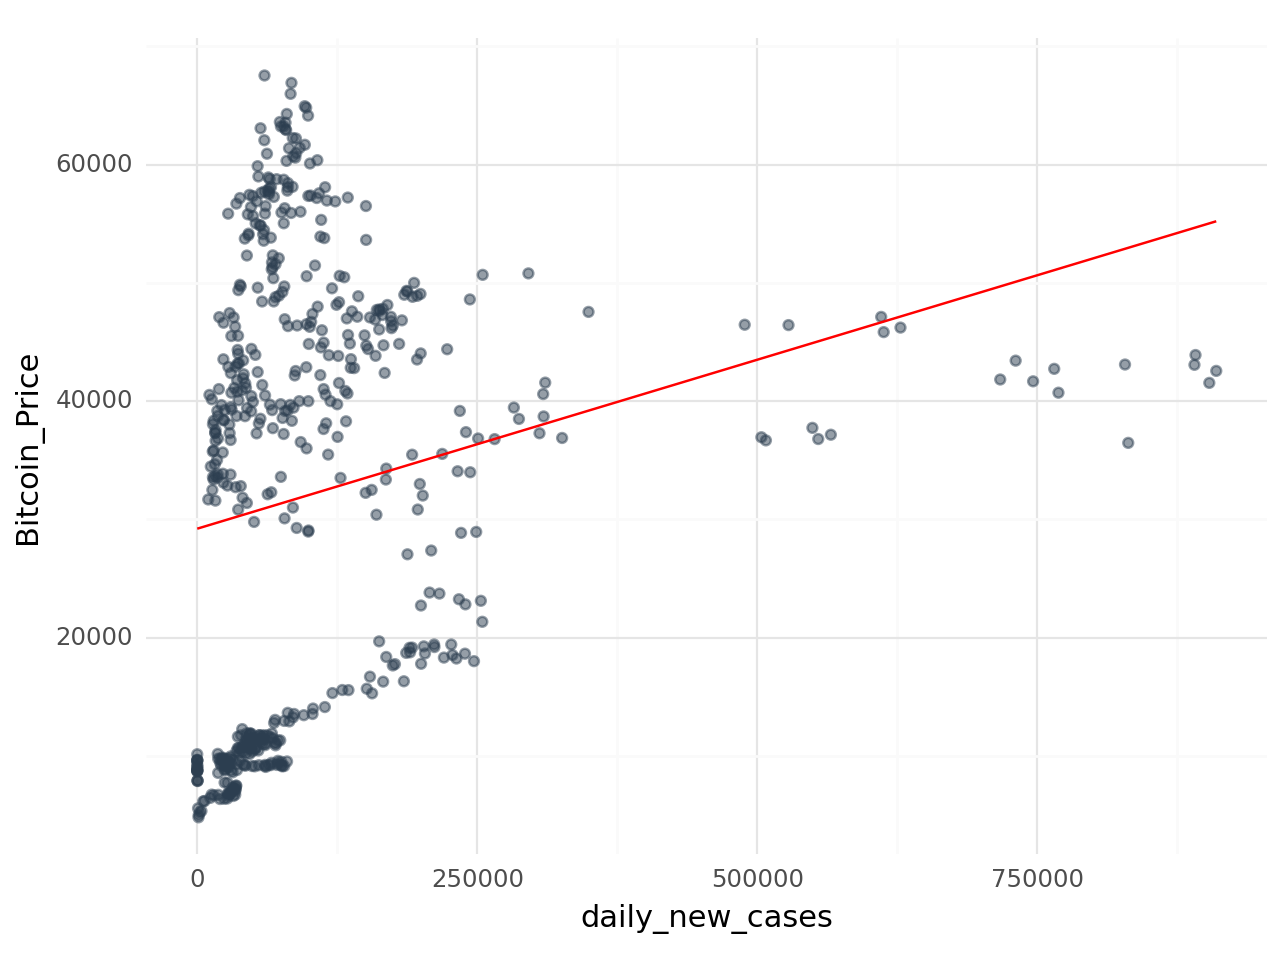

<Figure Size: (640 x 480)>

In [ ]:
ggplot(aes('daily_new_cases', 'Bitcoin_Price'), merged_data) \
    + geom_point(alpha = 0.5, color = "#2c3e50") \
    + geom_line(aes(y = 'fitted'), color = 'red') \
    + theme_minimal()



Machine Learning Models

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score



X = merged_data[['Bitcoin_Price', 'daily_new_cases']]
y = merged_data['Bitcoin_Price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = DecisionTreeRegressor()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 83184.84981982007
R-squared: 0.9997312821187037


In [41]:
from sklearn.ensemble import RandomForestRegressor


X = merged_data[['Bitcoin_Price', 'daily_new_cases']]
y = merged_data['Bitcoin_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 32124.69855540489
R-squared: 0.9998962253228588
